### Data Retrieval:

#### Fetch the top 100 news items for each category: Technology, Automobile, Science, and Hatke from the "inshorts" news platform. 
#### Extract the following information for each news item: Date, Time, Author, Title, Body,Published Source, Category.

In [203]:
# Importing Required Libraries

from bs4 import BeautifulSoup
import requests
import json
import pandas as pd

In [204]:
# Web Scraping from Inshorts News Website

Categories = ['technology',"automobile","science","hatke"]

# Creating Empty List with the required categories

Datetime =[]
Author = []
Title = []
Body=[]
Published_Source = []
Category =[]

# Loop for extracting the information for each news item

for category in Categories:
    for page_no in range(1,15):
        url =f"https://inshorts.com/api/en/search/trending_topics/{category}?page={page_no}"

        source = requests.get(url).text
        content_data = json.loads(source)

        for news_content in content_data['data']['news_list']:

            #Datetime
            try:
                Datetime.append(news_content['news_obj']['created_at'])
            except:
                Datetime.append("")

            #Author
            try:
                Author.append(news_content['news_obj']['author_name'])
            except:
                Author.append("")

            #Title
            try:
                Title.append(news_content['news_obj']['title'])
            except:
                Title.append("")

            #Body
            try:
                Body.append(news_content['news_obj']['content'])
            except:
                Body.append("")

            #Published_Source
            try:
                Published_Source.append(news_content['news_obj']['source_name'])
            except:
                Published_Source.append("")

            #Category
            Category.append(category)


# Creating dictionary and saving it in a dataframe    

dictionary = {"Datetime":Datetime, "Author":Author, "Title":Title, "Body":Body, "Published_Source":Published_Source, "Category":Category}
df  = pd.DataFrame(dictionary)

In [205]:
# Convert Unix timestamp in milliseconds to datetime format

df['Datetime'] = pd.to_datetime(df['Datetime'], unit='ms')

# Creating Date and Time columns separately as required 

df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.strftime('%H:%M')

# Deleting the original Datetime column

del df["Datetime"]

# Rearranging the dataframe in a required order

df = df[['Date', 'Time', 'Author', 'Title', 'Body', 'Published_Source', 'Category']]

In [206]:
df=df.dropna()

In [207]:
df=df.drop_duplicates()

In [208]:
# Displaying Dataframe
print(df.shape)
df.head()

(500, 7)


,Date,Time,Author,Title,Body,Published_Source,Category
0,2023-12-07,06:00,Editor InceptiveMind,Rolls-Royce runs world’s largest aeroengine to...,"Rolls-Royce's UltraFan, the world's largest an...",Inceptive Mind,technology
1,2023-12-07,05:41,Nidhi Sinha,Bard will become more capable of reasoning wit...,Google Assistant Vice-President Sissie Hsiao s...,Moneycontrol,technology
2,2023-12-07,04:26,Jay Pandya,Apple executive who invented iPhone screen and...,Apple Inc.'s senior executive overseeing touch...,BQ Prime,technology
3,2023-12-07,04:20,Pragya Swastik,Google says its Gemini AI model beats GPT-4,Google has claimed that its new AI model Gemin...,Google,technology
4,2023-12-07,04:17,Pragya Swastik,Video shows Google's Gemini AI solving visual ...,A video shared by Google showed the company's ...,YouTube,technology


### Data Storage:

#### Design a relational database schema to store the extracted information.
#### Pipeline the data into the designed database.

In [209]:
# Importing Required Libraries

import sqlite3
import pandas as pd

In [210]:
# Connect to SQLite database

conn = sqlite3.connect('news_database.db')

# Create a cursor object to execute SQL queries

cursor = conn.cursor()

In [211]:
# Drop Table If exists

cursor.execute('''DROP TABLE IF EXISTS News_Items''')

In [212]:
# Create a table in the database

cursor.execute('''
    CREATE TABLE IF NOT EXISTS News_Items (
        S_No INTEGER PRIMARY KEY,
        Date Date,
        Time Time,
        Author TEXT,
        Title TEXT,
        Body TEXT,
        Published_Source TEXT,
        Category TEXT
    )
''')

In [213]:
# Pipeline the data into the database

for index, row in df.iterrows():
    cursor.execute('''
        INSERT INTO News_Items (Date, Time, Author, Title, Body, Published_Source, Category)
        VALUES (?, ?, ?, ?, ?, ?, ?)
    ''', (row['Date'], row['Time'], row['Author'], row['Title'], row['Body'], row['Published_Source'], row['Category']))


In [214]:
# Commit the changes
conn.commit()

In [215]:
# Execute a SELECT query to fetch all rows from the News Items table
cursor.execute('''select * from News_Items''')

# Fetch all rows from the result set
rows = cursor.fetchall()

# Get column names from the cursor description
columns = [description[0] for description in cursor.description]
print(columns)


# Display results
for row in rows:
    print(row)    
    
# Close the connection    
conn.close()

['S_No', 'Date', 'Time', 'Author', 'Title', 'Body', 'Published_Source', 'Category']
(1, '2023-12-07', '06:00', 'Editor InceptiveMind', 'Rolls-Royce runs world’s largest aeroengine to maximum power', "Rolls-Royce's UltraFan, the world's largest and most powerful jet engine, has achieved a significant milestone by running on 100% Sustainable Aviation Fuel. This breakthrough will significantly reduce aviation's environmental impact by delivering greater fuel efficiency, lower emissions, and increased sustainability. The demonstrator has a 140-inch fan diameter and can produce 64 MW of power.", 'Inceptive Mind', 'technology')
(2, '2023-12-07', '05:41', 'Nidhi Sinha', 'Bard will become more capable of reasoning with Gemini: Google', 'Google Assistant Vice-President Sissie Hsiao said Google chatbot Bard will be powered by a specifically tuned version of AI model Gemini. Gemini Pro will make Bard more capable of understanding, reasoning, coding and planning, Hsiao added. It will support text-

# 

### Keyword Analysis:

#### Create a word cloud visualization based on the frequency of the following keywords in the fetched articles: "Diwali", "Offer", "Discount", "Dhamaka", "Dead", "Fire", "Burn".

In [216]:
df.head()

,Date,Time,Author,Title,Body,Published_Source,Category
0,2023-12-07,06:00,Editor InceptiveMind,Rolls-Royce runs world’s largest aeroengine to...,"Rolls-Royce's UltraFan, the world's largest an...",Inceptive Mind,technology
1,2023-12-07,05:41,Nidhi Sinha,Bard will become more capable of reasoning wit...,Google Assistant Vice-President Sissie Hsiao s...,Moneycontrol,technology
2,2023-12-07,04:26,Jay Pandya,Apple executive who invented iPhone screen and...,Apple Inc.'s senior executive overseeing touch...,BQ Prime,technology
3,2023-12-07,04:20,Pragya Swastik,Google says its Gemini AI model beats GPT-4,Google has claimed that its new AI model Gemin...,Google,technology
4,2023-12-07,04:17,Pragya Swastik,Video shows Google's Gemini AI solving visual ...,A video shared by Google showed the company's ...,YouTube,technology


In [217]:
# Importing Required Libraries

from wordcloud import WordCloud
import matplotlib.pyplot as plt

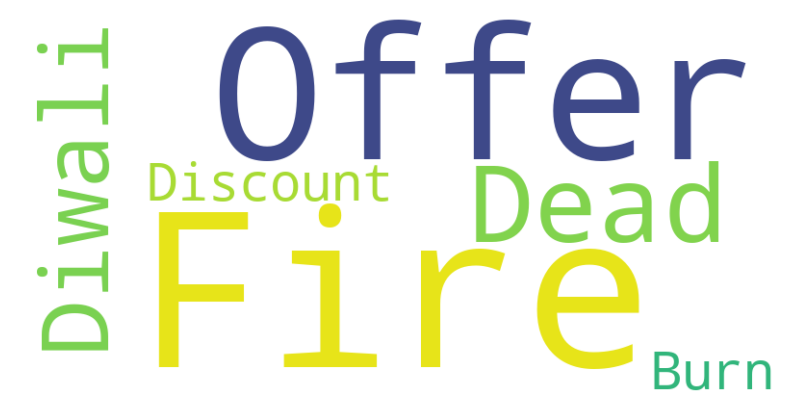

In [218]:
# Keywords for analysis
keywords = ["Diwali", "Offer", "Discount", "Dhamaka", "Dead", "Fire", "Burn"]

# Combine relevant text fields (Title, Body) into a single column for analysis
df['Text'] = df['Title'] + ' ' + df['Body']

# Concatenate the text from all rows
all_text = ' '.join(df['Text'])

# Generate word cloud based on the frequency of specified keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({keyword: all_text.lower().count(keyword.lower()) for keyword in keywords})

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()